## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. Cells in which "# YOUR CODE HERE" is found are the cells where your graded code should be written.
2. In order to test out or debug your code you may also create notebook cells or edit existing notebook cells other than "# YOUR CODE HERE". We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Deep Learning

In this exercise, you will use a deep neural network to predict the values of houses based on some provided input data. You will use keras to build the model. Below is a description of how the keras models are set up.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

import pandas as pd
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

plt.style.use("ggplot")
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
house_data = fetch_california_housing()

In [3]:
print(house_data["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
house_features = pd.DataFrame(house_data["data"], columns=house_data["feature_names"])
house_prices = pd.Series(house_data["target"])
x_train, x_test, y_train, y_test = train_test_split(house_features, house_prices, test_size=0.2, random_state=0)

In [5]:
x_train.shape

(16512, 8)

This tells us that there are 16512 samples with 8 features each.

In [6]:
y_train.shape

(16512,)

This tells us that there are 16512 samples of a single target.

In [7]:
y_train.mean(), y_train.std(), y_train.min(), y_train.max()

(2.0724989589389398, 1.1569151048305375, 0.14999, 5.00001)

The keras model consists of multiple parts:

1. Construct the model layers, neurons per layer, and activation functions
1. Determine the loss function, metrics, and optimization method
1. Fit the model to some data
1. Evaluate the model using the same metric

Some relevant docs:
 - [initializers](https://keras.io/initializers/)
 - [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
 - [regularizations](https://keras.io/regularizers/)
 - [optimizers](https://keras.io/optimizers/)
 - [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)


First, to construct a model, use the [Sequential](https://keras.io/getting-started/sequential-model-guide/) object. You can pass a list of layers to the sequential object. For this exercise, we will only be using the [Dense](https://keras.io/layers/core/#dense) layers.

In [8]:
from tensorflow.python.keras.layers.core import Activation
# Create a list of layers with the variable name "layers".
#
# - The list should contain 3 consecutive hidden layers with 100 neurons each,
#   and an output layer with 1 neuron. 
# - In the first layer, you should specify an input_shape. It is not necessary to do so
#   in subsequent layers.
# - The output layer should have 1 neuron because we are predicting a single regression target.
# - Use any activation you like such as "relu" or "tanh", you can alternate for each layer
#   For your first run, try using the linear activation and then see if modifying the activations
#   improves the result.

# Pass the list to keras.Sequential and save the returned model to the variable name "model".

# Optional - give each layer a name and see how that shows up in the model summary.

# YOUR CODE HERE
layers = [
          keras.layers.Dense(100, activation="relu", input_shape=(8,), name='layer1'),
          keras.layers.Dense(100, activation="relu", name='layer2'),
          keras.layers.Dense(100, activation="relu", name='layer3'),
          keras.layers.Dense(1, name='output_layer')
          ]
model = keras.Sequential(layers)


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               900       
_________________________________________________________________
layer2 (Dense)               (None, 100)               10100     
_________________________________________________________________
layer3 (Dense)               (None, 100)               10100     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
assert isinstance(model, Sequential)
assert len(layers) == 4
for i, layer in enumerate(layers):
    assert isinstance(layers[i], Dense)
    assert layer.weights[1].shape == [100, 100, 100, 1][i]

In [10]:
initial_weights = model.get_weights()

In TensorFlow, models are "compiled" before training. Compiling specifies the type of optimizer (e.g., gradient descent) and loss function, and creates code that will run efficiently on your hardware during training and model prediction.

Review the model's `compile()` method, and use it to create compiled code in the cell below.  
https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

In this notebook we'll use the [stochastic gradient descent (SGD)](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) and the [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizers.

In [11]:
# - Instantiate an SGD optimizer with learning rate of 1e-7, and save it as "optimizer"
# - Apply the model's .compile() method to set it up for training.
#   - Note that you can use each loss and metric's string name rather
#     than instantiating a loss or metric object, and passing the object.
#     Because we want to set a non-default learning rate, we must
#     instantiate an optimizer object and pass that to compile(), rather
#     than an optimizer string name.

# Set up the model to do the following:
# - use stochastic gradient descent (sgd) to fit the model (via your 'optimizer' object)
# - use mean absolute error (mae) as its *loss function*
# - use mean absolute error (mae) as one of its *metrics*
# - use mean squared error (mae) as one of its *metrics*

# YOUR CODE HERE
optimizer = keras.optimizers.SGD(learning_rate=1e-7)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae', 'mse'])

In [12]:
assert isinstance(model.optimizer, keras.optimizers.SGD)
assert model.loss in ["mae", "mean_absolute_error"]

Now we'll train the model for 50 epochs with a batch size of 1000. This means the following:

- The training set will be split into batches, each composed of 1000 samples.
- Each batch will be processed by the neural network to produce 1000 predications.
- The predictions will be compared against the targets to compute the losses.
- The loss values are passed backwards through the network to compute the loss gradients for those 1000 samples.
- Via the SGD procedure, the averages of those 1000 gradients are used to update the model's parameters.
- After all batches have been processed in this manner, one "epoch" has been completed.
- This is done again and again until the number of specified epochs (50) are completed.

In [13]:
# Now fit the model
n_epochs = 20
history = model.fit(x_train, y_train, batch_size=1000, epochs=n_epochs)

Epoch 1/20
17/17 [==============================] - 1s 9ms/step - loss: 14.1359 - mae: 14.1359 - mse: 358.0807
Epoch 2/20
17/17 [==============================] - 0s 9ms/step - loss: 10.5679 - mae: 10.5679 - mse: 207.4509
Epoch 3/20
17/17 [==============================] - 0s 9ms/step - loss: 7.1144 - mae: 7.1144 - mse: 100.8982
Epoch 4/20
17/17 [==============================] - 0s 11ms/step - loss: 4.1061 - mae: 4.1061 - mse: 37.6892
Epoch 5/20
17/17 [==============================] - 0s 10ms/step - loss: 2.2057 - mae: 2.2057 - mse: 10.4588
Epoch 6/20
17/17 [==============================] - 0s 8ms/step - loss: 1.6033 - mae: 1.6033 - mse: 4.7786
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 1.5426 - mae: 1.5426 - mse: 4.3488
Epoch 8/20
17/17 [==============================] - 0s 8ms/step - loss: 1.5180 - mae: 1.5180 - mse: 4.1892
Epoch 9/20
17/17 [==============================] - 0s 12ms/step - loss: 1.4962 - mae: 1.4962 - mse: 4.0474
Epoch 10/20
17/17 [===

We had you set the learning rate to a very small value, so you could seed the iterative improvement across training epochs. More typicaly learning rates are 1e-3 or 1e-4, but the housing data is so "simple" relative to the power of our neural network, we would have had pretty good convergence within a single epoch, and you would not have been able to observe the more typical, steady progress to convergence.

Training loss on the final epoch was: 1.3627


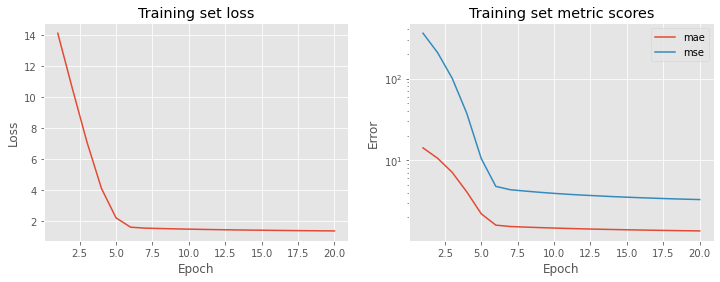

In [14]:
# Let's plot the training set loss as a function of training epoch, as well
# as the metric scores. In general, if you don't see your loss curve flatten
# at the end of the training session, you'l want to increase the number of
# training epochs, or increase the learning rate.
#
# In this case, if it doesn't look nearly flat than you've likely specified
# your model or learning rate incorrectly.

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, n_epochs+1), history.history['loss'])
plt.title('Training set loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.semilogy(np.arange(1, n_epochs+1), history.history['mae'], label='mae')
plt.semilogy(np.arange(1, n_epochs+1), history.history['mse'], label='mse')
plt.legend()
plt.title('Training set metric scores')
plt.xlabel('Epoch')
plt.ylabel('Error')

print(f"Training loss on the final epoch was: {history.history['loss'][-1]:0.4f}")

In [15]:
# Here we can evaluate how our model does based on the test data
model.evaluate(x_test, y_test)

129/129 [==============================] - 1s 2ms/step - loss: 1.3412 - mae: 1.3412 - mse: 3.5313


[1.341246485710144, 1.341246485710144, 3.531327962875366]

Now let's try another optimizer instead of stochastic gradient descent (SGD). [Adam](https://keras.io/optimizers/#adam) is the recommended default for training neural networks since it usually performs quite well. In the next cell, compile the model with Adam instead of SGD and use the same loss and metrics. After compiling, fit the data for as many epochs as you think it takes to see the value start to converge.

In [16]:
# - Instantiate an Adam optimizer with learning rate of 1e-5, and save it as "optimizer"
# - Recompile the model using Adam and the same loss and metrics as previously
# - Call .fit() to train you model, using a batch size of 1000. You choose the number of epochs.
# - Note that we are now using a larger learning rate, so convergence
#   should occur more quickly.

# Before starting, we'll reset the model parameters back to their original,
# random state, so we aren't trying to train an already trained model.
model.set_weights(initial_weights)

# YOUR CODE HERE
optimizer = keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae', 'mse'])
h2 = history = model.fit(x_train, y_train, batch_size=1000, epochs=n_epochs)


Epoch 1/20
17/17 [==============================] - 1s 8ms/step - loss: 10.8962 - mae: 10.8962 - mse: 231.3520
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 2.6674 - mae: 2.6674 - mse: 15.1997
Epoch 3/20
17/17 [==============================] - 0s 11ms/step - loss: 1.6676 - mae: 1.6676 - mse: 4.5800
Epoch 4/20
17/17 [==============================] - 0s 10ms/step - loss: 1.3426 - mae: 1.3426 - mse: 3.0962
Epoch 5/20
17/17 [==============================] - 0s 9ms/step - loss: 1.2461 - mae: 1.2461 - mse: 2.6488
Epoch 6/20
17/17 [==============================] - 0s 9ms/step - loss: 1.1956 - mae: 1.1956 - mse: 2.4354
Epoch 7/20
17/17 [==============================] - 0s 8ms/step - loss: 1.1655 - mae: 1.1655 - mse: 2.3173
Epoch 8/20
17/17 [==============================] - 0s 11ms/step - loss: 1.1442 - mae: 1.1442 - mse: 2.2309
Epoch 9/20
17/17 [==============================] - 0s 10ms/step - loss: 1.1282 - mae: 1.1282 - mse: 2.1623
Epoch 10/20
17/17 [========

In [17]:
assert isinstance(model.optimizer, keras.optimizers.Adam)
assert model.loss in ["mae", "mean_absolute_error"]

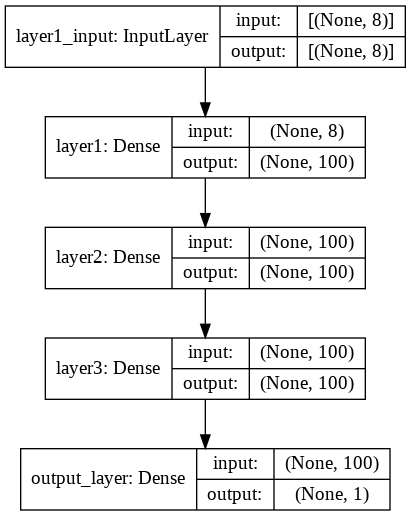

In [18]:
# You can optionally visualize the model here, with some added package installs.

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

Training loss on the final epoch was: 0.9964


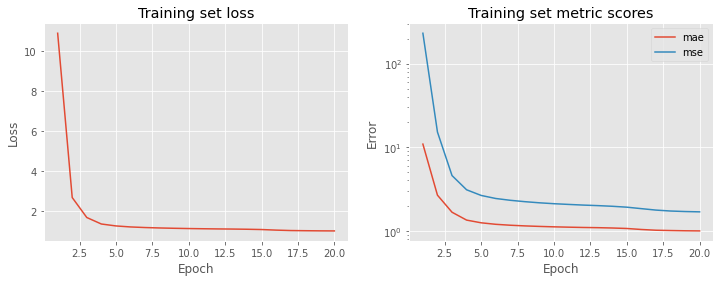

In [19]:
# Let's plot the training loss and metric scores again

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, n_epochs+1), history.history['loss'])
plt.title('Training set loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.semilogy(np.arange(1, n_epochs+1), history.history['mae'], label='mae')
plt.semilogy(np.arange(1, n_epochs+1), history.history['mse'], label='mse')
plt.legend()
plt.title('Training set metric scores')
plt.xlabel('Epoch')
plt.ylabel('Error')

print(f"Training loss on the final epoch was: {history.history['loss'][-1]:0.4f}")

In [20]:
model.evaluate(x_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.9927 - mae: 0.9927 - mse: 1.7857


[0.9927018284797668, 0.9927018284797668, 1.7857496738433838]

Now recreate the model, again named `model`, with dropout layers. Add two dropout layers, using [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout), one after the first layer of neurons and one after the second layer of neurons.
Create a new list of layers, and name it `layers`, rather than reusing your old list (so that the model parameters will be randomly initialized again). Then construct the model as before.
Select a low value of dropout (say, <0.1) that results in a good score.

In [21]:
# Create your new model, with dropout layers.

# YOUR CODE HERE
layers = [
          keras.layers.Dense(100, activation="relu", input_shape=(8,), name='layer1'),
          keras.layers.Dropout(0.03),
          keras.layers.Dense(100, activation="relu", name='layer2'),
          keras.layers.Dropout(0.03),
          keras.layers.Dense(100, activation="relu", name='layer3'),
          keras.layers.Dense(1, name='output_layer')
          ]
model = keras.Sequential(layers)


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 100)               900       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
layer2 (Dense)               (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
layer3 (Dense)               (None, 100)               10100     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
__________________________________________________

In [23]:
assert len(layers) == 6
assert isinstance(layers[1], Dropout)
assert isinstance(layers[3], Dropout)
for i,layer in enumerate(layers):
    if i not in [1,3]:
        assert isinstance(layers[i], keras.layers.Dense) 
        assert layer.weights[1].shape == [100, 0, 100, 0, 100, 1][i]

In [24]:
# Because dropout reduces the convergence rate (but may ultimately coverge to
# a lower loss), it sometimes requires training for more epochs than otherwise.

optimizer = Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='mae', metrics=['mae', "mse"])
n_epochs = 50
history = model.fit(x_train, y_train, batch_size=1000, epochs=n_epochs, verbose=1)

Epoch 1/50
17/17 [==============================] - 1s 12ms/step - loss: 60.2640 - mae: 60.2640 - mse: 5959.4429
Epoch 2/50
17/17 [==============================] - 0s 13ms/step - loss: 48.3406 - mae: 48.3406 - mse: 4030.5540
Epoch 3/50
17/17 [==============================] - 0s 15ms/step - loss: 37.3723 - mae: 37.3723 - mse: 2423.1948
Epoch 4/50
17/17 [==============================] - 0s 13ms/step - loss: 27.7004 - mae: 27.7004 - mse: 1470.5791
Epoch 5/50
17/17 [==============================] - 0s 11ms/step - loss: 20.8660 - mae: 20.8660 - mse: 982.5223
Epoch 6/50
17/17 [==============================] - 0s 14ms/step - loss: 17.4279 - mae: 17.4279 - mse: 792.1948
Epoch 7/50
17/17 [==============================] - 0s 14ms/step - loss: 16.8732 - mae: 16.8732 - mse: 788.9359
Epoch 8/50
17/17 [==============================] - 0s 14ms/step - loss: 16.2280 - mae: 16.2280 - mse: 763.6509
Epoch 9/50
17/17 [==============================] - 0s 16ms/step - loss: 16.0767 - mae: 16.0767 - ms

Training loss on the final epoch was: 9.4815


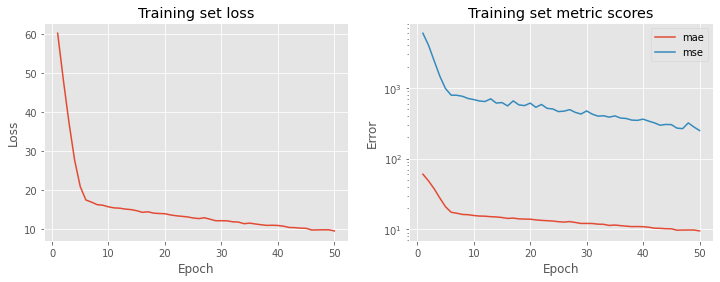

In [25]:
# Let's plot the training loss and metric scores again

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, n_epochs+1), history.history['loss'])
plt.title('Training set loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.semilogy(np.arange(1, n_epochs+1), history.history['mae'], label='mae')
plt.semilogy(np.arange(1, n_epochs+1), history.history['mse'], label='mse')
plt.legend()
plt.title('Training set metric scores')
plt.xlabel('Epoch')
plt.ylabel('Error')

print(f"Training loss on the final epoch was: {history.history['loss'][-1]:0.4f}")

In [26]:
model.evaluate(x_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 1.6787 - mae: 1.6787 - mse: 5.8726


[1.6786935329437256, 1.6786935329437256, 5.872591495513916]

Select a dropout rate that gets an okay score--one that is sufficient to pass the following `assert` test.

Note that in this case, dropout did not likely result in better loss or metric scores on the test set versus the models without dropout. Dropout does not always help, but it sometimes does, especially if you have a very large model but a somewhat undersized dataset. In that case, dropout serves as a regularization technique, like L1- or L2-norm weight penalty terms in linear regression.

In [27]:
assert model.evaluate(x_test, y_test)[0] < 3

129/129 [==============================] - 0s 3ms/step - loss: 1.6787 - mae: 1.6787 - mse: 5.8726


## Feedback

In [30]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return """
     I actually do want to provide feedback on this assignment:
    The way in which many of these asserts are setup do not account for more than 1 way of accomplishing the same task. I'm not even referring to the requirement of explicitly using named lists.
    The metrics in the activity are requried to be MSE and MAE, both of which can be defined as keras.metrics.mae or keras.metrics.mean_absolute_error or even 'mae'. The same can be said for MSE.
      - This is acknowledged here: assert model.loss in ["mae", "mean_absolute_error"]
      - However, when we index history.history the assert uses : plt.semilogy(np.arange(1, n_epochs+1), history.history['mae'], label='mae')
                                                                 plt.semilogy(np.arange(1, n_epochs+1), history.history['mse'], label='mse')
      - The above code indexes history.history using titles that are incorrect in 2/3 ways. The correct indexing for the original code I wrote would be history.history[mean_absolute_error], even when I change the passed variable to be keras.metrics.mae, the provided
        assert statement is still not correct.

    While its not the most difficult to fix, it seems like something that can be easily avoided. The way that many of the tests are setup are simply not good.
      - The fix here is just using 'mse', 'mae', etc in the list, but to me that is incredibly convoluted (The linked documentation shows both ways, with the way I did it showing up at the top of the doc). YMMV I guess.  
      - I suppose if I just 'follow the instructions' or whatever the piazza response is trying to get at it would be quicker, but when they are blantantly c/p'd I can't be bothered (my code would have 'mae' in every field):
            From [60]:
            # - use mean absolute error (mae) as its *loss function*
            # - use mean absolute error (mae) as one of its *metrics*
            # - use mean squared error (mae) as one of its *metrics*
    """